In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('result_price_Re_230508.xlsx')
df

,Unnamed: 0,stt,year,promotionid,promotionname,productid,storeid,itemid,statusname,facing,...,Khối lượng,Phân loại size,Phân khúc giá,TGKM_grouped,Gia_grouped,brand_ranking,Cluster,Cluster0,Cluster00,Cluster_tong
0,2,5,2022,697499,CTKM THÁNG 12 (19/12-01/01) -3288,9892840000187,7237,1608000500,KD bình thường,1,...,830,LỚN,RẺ,14,Rẻ,4,1,NaN,NaN,Cum 0
1,14,34,2022,697499,CTKM THÁNG 12 (19/12-01/01) -3288,9892840000187,4493,1608000500,KD bình thường,1,...,830,LỚN,RẺ,14,Rẻ,4,1,NaN,NaN,Cum 0
2,19,48,2022,697499,CTKM THÁNG 12 (19/12-01/01) -3288,9892840000187,1696,1608000500,KD bình thường,1,...,830,LỚN,RẺ,14,Rẻ,4,1,NaN,NaN,Cum 0
3,45,300,2022,697499,CTKM THÁNG 12 (19/12-01/01) -3288,9892840000187,6008,1608000500,KD bình thường,1,...,830,LỚN,RẺ,14,Rẻ,4,1,NaN,NaN,Cum 0
4,51,317,2022,697499,CTKM THÁNG 12 (19/12-01/01) -3288,9892840000187,2453,1608000500,KD bình thường,1,...,830,LỚN,RẺ,14,Rẻ,4,1,NaN,NaN,Cum 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40467,30114,113943,2022,657343,CTKM THÁNG 11 (04/11-04/12) -3288,1053109000060,6498,1908000184,KD bình thường,2,...,470,TRUNG,RẺ,60,Rẻ,3,0,3.0,NaN,Cum 6
40468,30118,113982,2022,518852,CTKM THÁNG 6 (13/06-26/06) COMBO 2 CHAI GIÁ 2...,1053109000060,6187,1908000184,KD bình thường,2,...,470,TRUNG,RẺ,7,Rẻ,3,0,3.0,NaN,Cum 6
40469,30120,113984,2022,536219,CTKM THÁNG 6 - (27/06-10/07) - Mua 8 tặng 1 -...,1053109000060,6187,1908000184,KD bình thường,2,...,470,TRUNG,RẺ,7,Rẻ,3,0,3.0,NaN,Cum 6
40470,30121,113985,2022,574953,CTKM THÁNG 8 (08/08-28/08) - 3288,1053109000060,6187,1908000184,KD bình thường,2,...,470,TRUNG,RẺ,30,Rẻ,3,0,3.0,NaN,Cum 6


# Phân tích sản phẩm:

In [5]:
count_cum = df.groupby('Cluster_tong').size().reset_index().sort_values(by = 'Cluster_tong', ascending= True)
count_cum

,Cluster_tong,0
0,Cum 0,5162
1,Cum 1,9643
2,Cum 2,3353
3,Cum 3,6867
4,Cum 4,1721
5,Cum 5,6892
6,Cum 6,6834


## Số lượng mẫu:

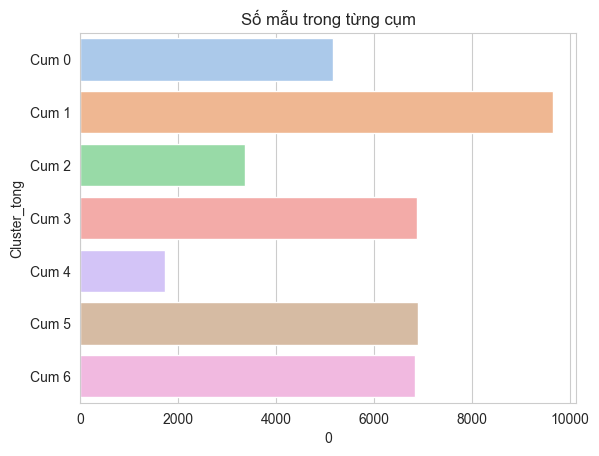

In [36]:
ax = sns.barplot(count_cum, y= 'Cluster_tong', x = 0)
plt.title('Số mẫu trong từng cụm')
plt.show();

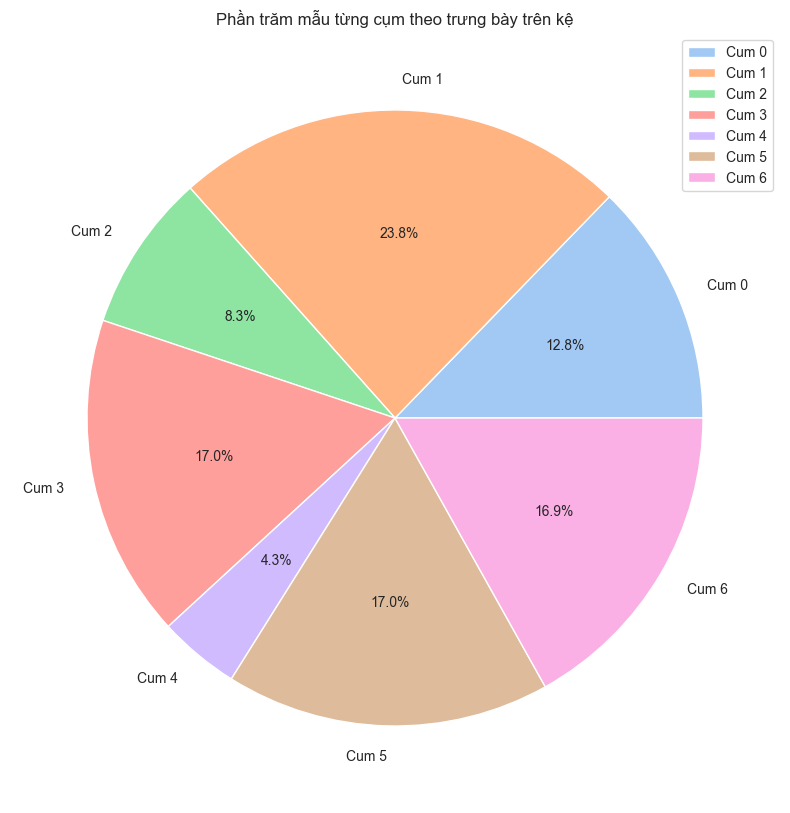

In [9]:
plt.figure(figsize=(10,10))
plt.title('Phần trăm mẫu từng cụm theo trưng bày trên kệ')
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.pie(count_cum[0], labels=count_cum['Cluster_tong'], autopct='%1.1f%%')
plt.legend()
plt.show();

- Cụm lớn: 0,1,3,5,6
- Cụm nhỏ: 2,4

## Tăng trưởng theo số lượng:

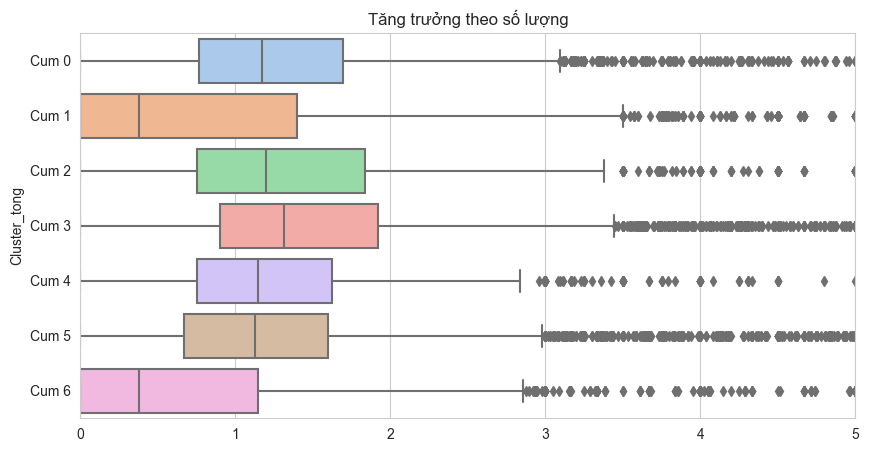

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y="Cluster_tong", x="TT theo so luong", dodge=False).set(xlabel=None)
plt.xlim(0,5)
plt.legend([],[], frameon=False)
plt.title('Tăng trưởng theo số lượng')
plt.show();

Cụm hiệu quả: cụm 0, cụm 3, cụm 5

## Phân loại size:

In [15]:
df_size = df.groupby(['Cluster_tong', 'Phân loại size']).size().reset_index()
df_size.rename(columns={0: "count"}, inplace = True)
df_size

,Cluster_tong,Phân loại size,count
0,Cum 0,LỚN,5162
1,Cum 1,NHỎ,9643
2,Cum 2,LỚN,3353
3,Cum 3,LỚN,6867
4,Cum 4,LỚN,1721
5,Cum 5,TRUNG,6892
6,Cum 6,TRUNG,6834


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


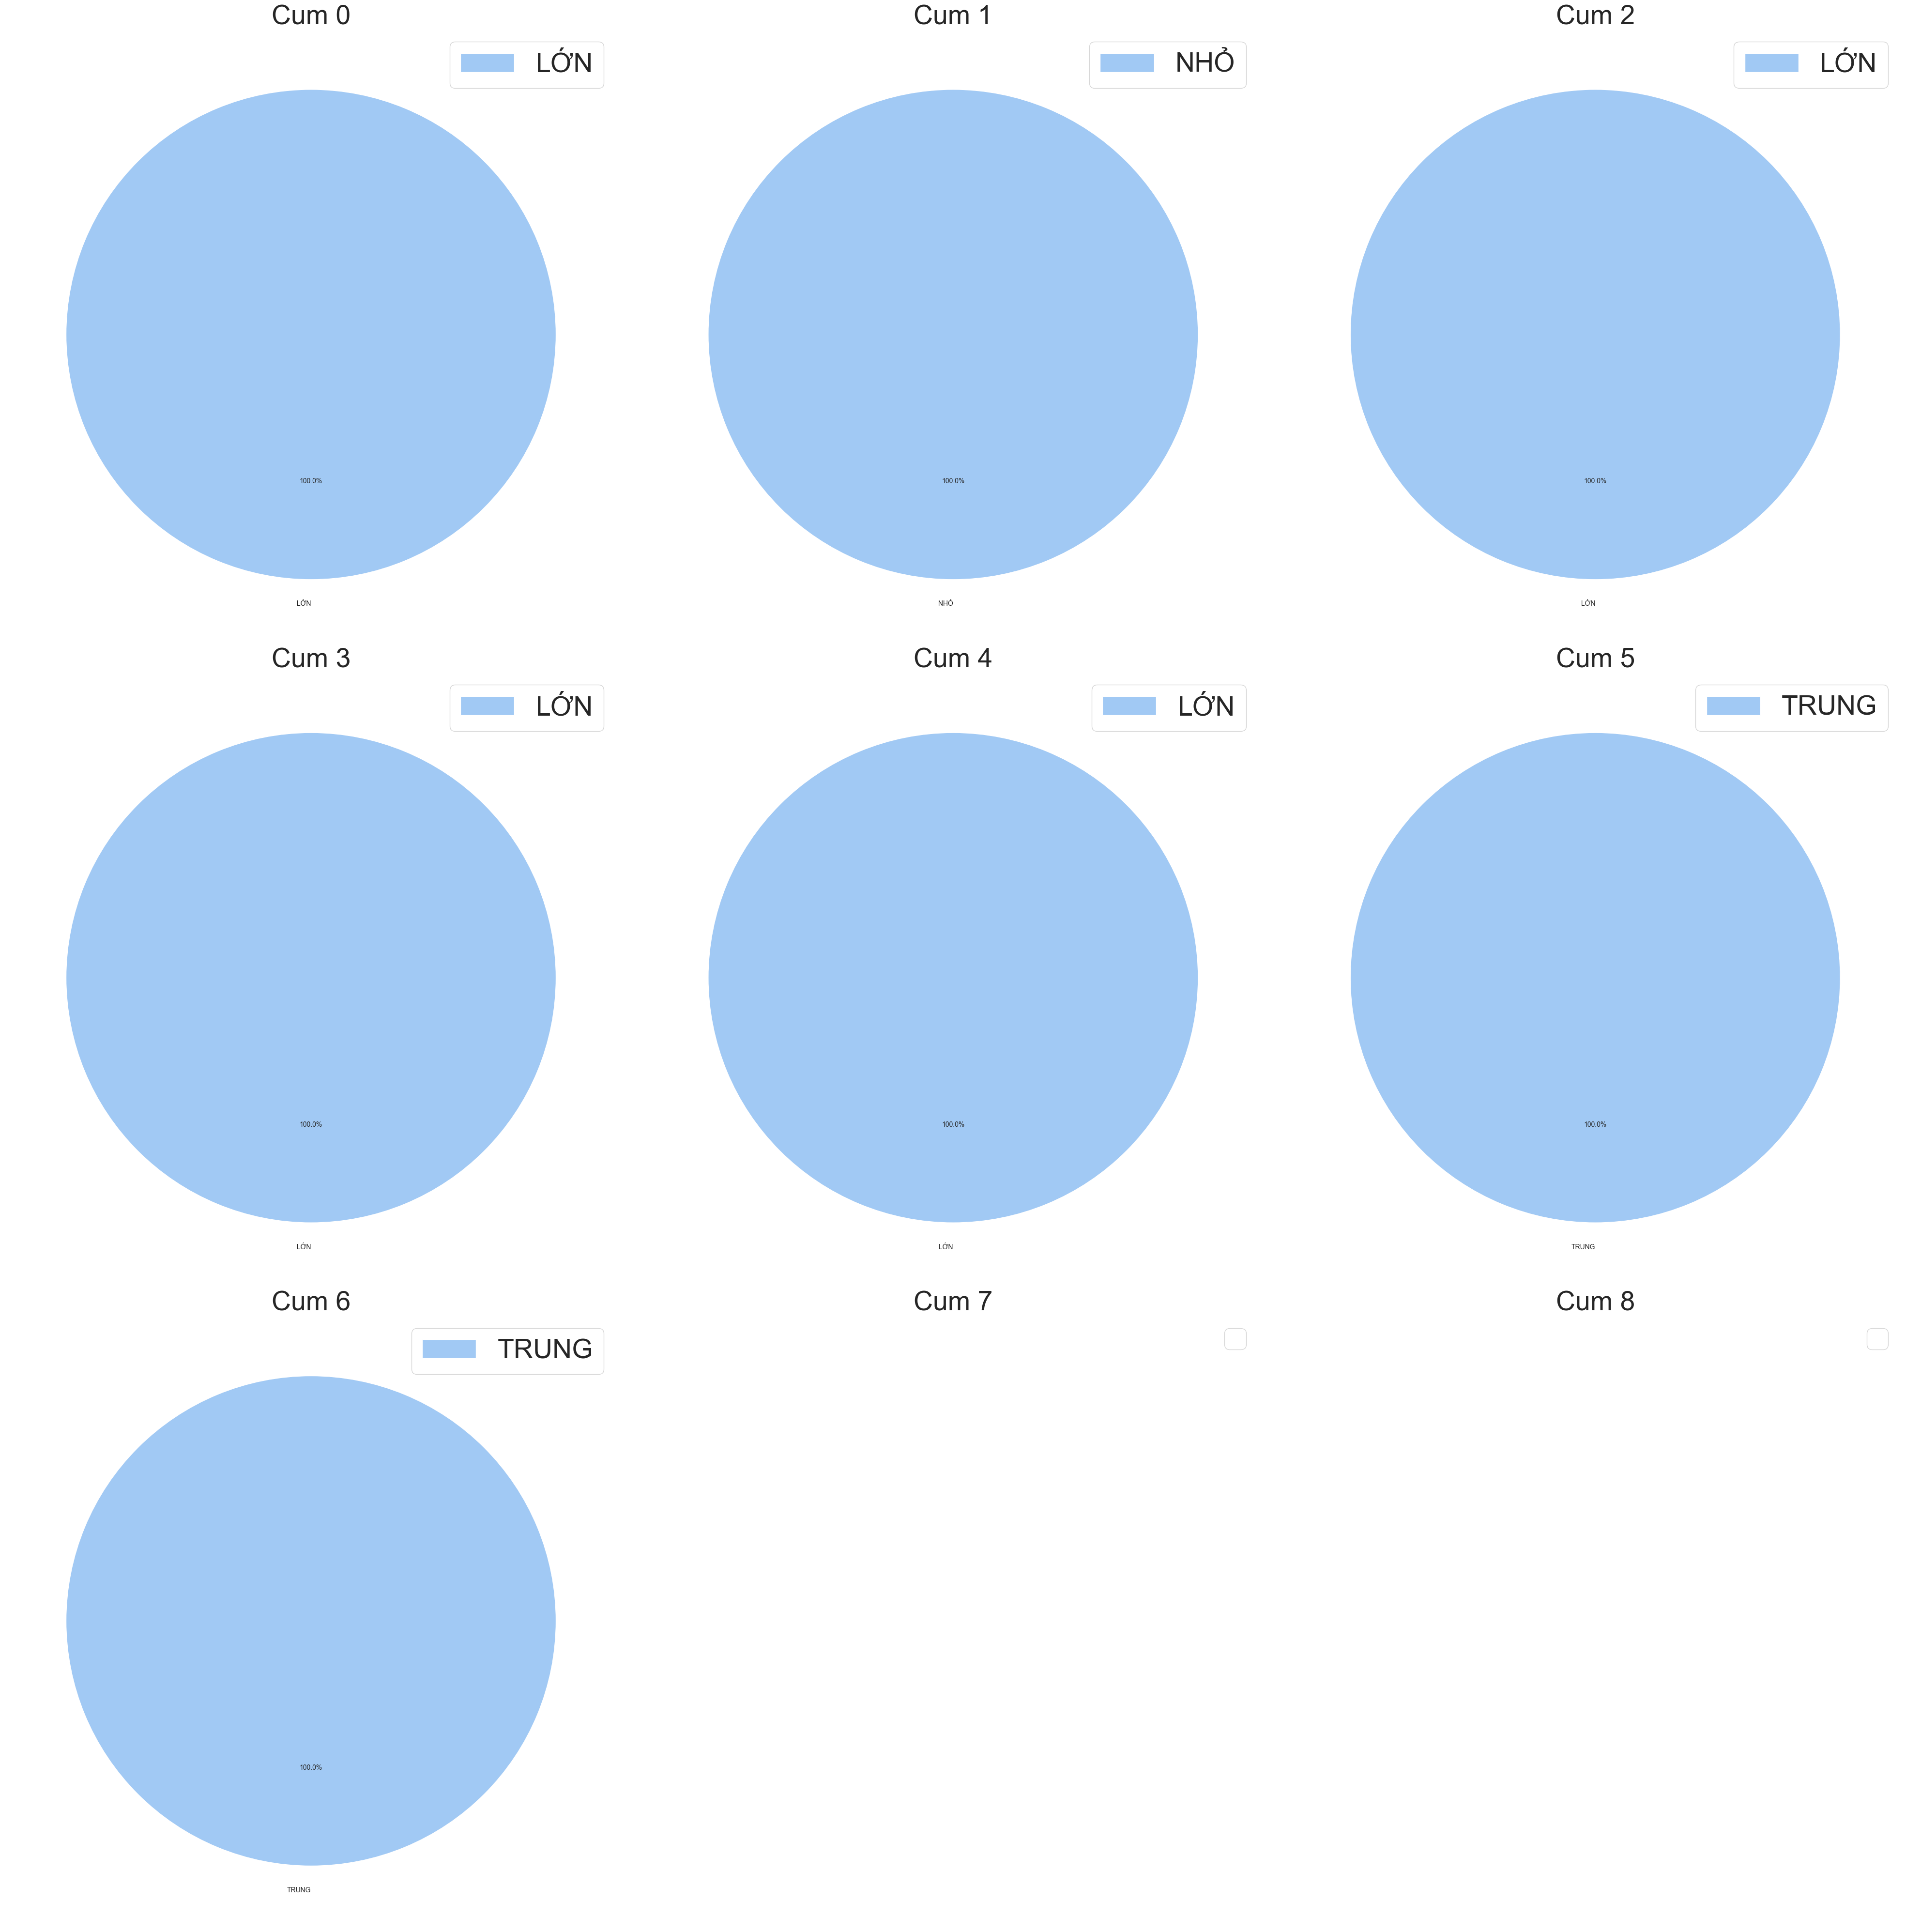

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40, 40))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_size[df_size['Cluster_tong'] == f'Cum {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Phân loại size'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cum {i}', fontsize = 40)
    ax.legend(fontsize = 40)

plt.tight_layout()
plt.show();

Size hiệu quả: size lớn, trung

In [18]:
df_gram = df.groupby(['Cluster_tong', 'Khối lượng']).size().reset_index()
df_gram.rename(columns={0: "count"}, inplace = True)
df_gram

,Cluster_tong,Khối lượng,count
0,Cum 0,800,3436
1,Cum 0,830,1726
2,Cum 1,250,4484
3,Cum 1,255,5159
4,Cum 2,800,3353
5,Cum 3,800,6867
6,Cum 4,830,1721
7,Cum 5,470,6892
8,Cum 6,470,6834


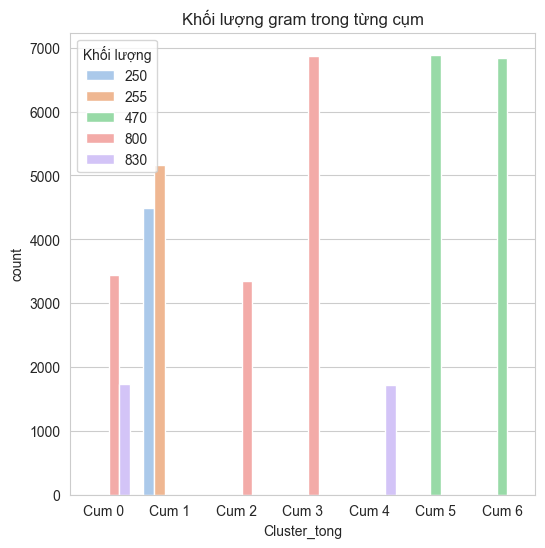

In [19]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_gram, x= 'Cluster_tong', y = 'count', hue = 'Khối lượng')
plt.title('Khối lượng gram trong từng cụm')
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


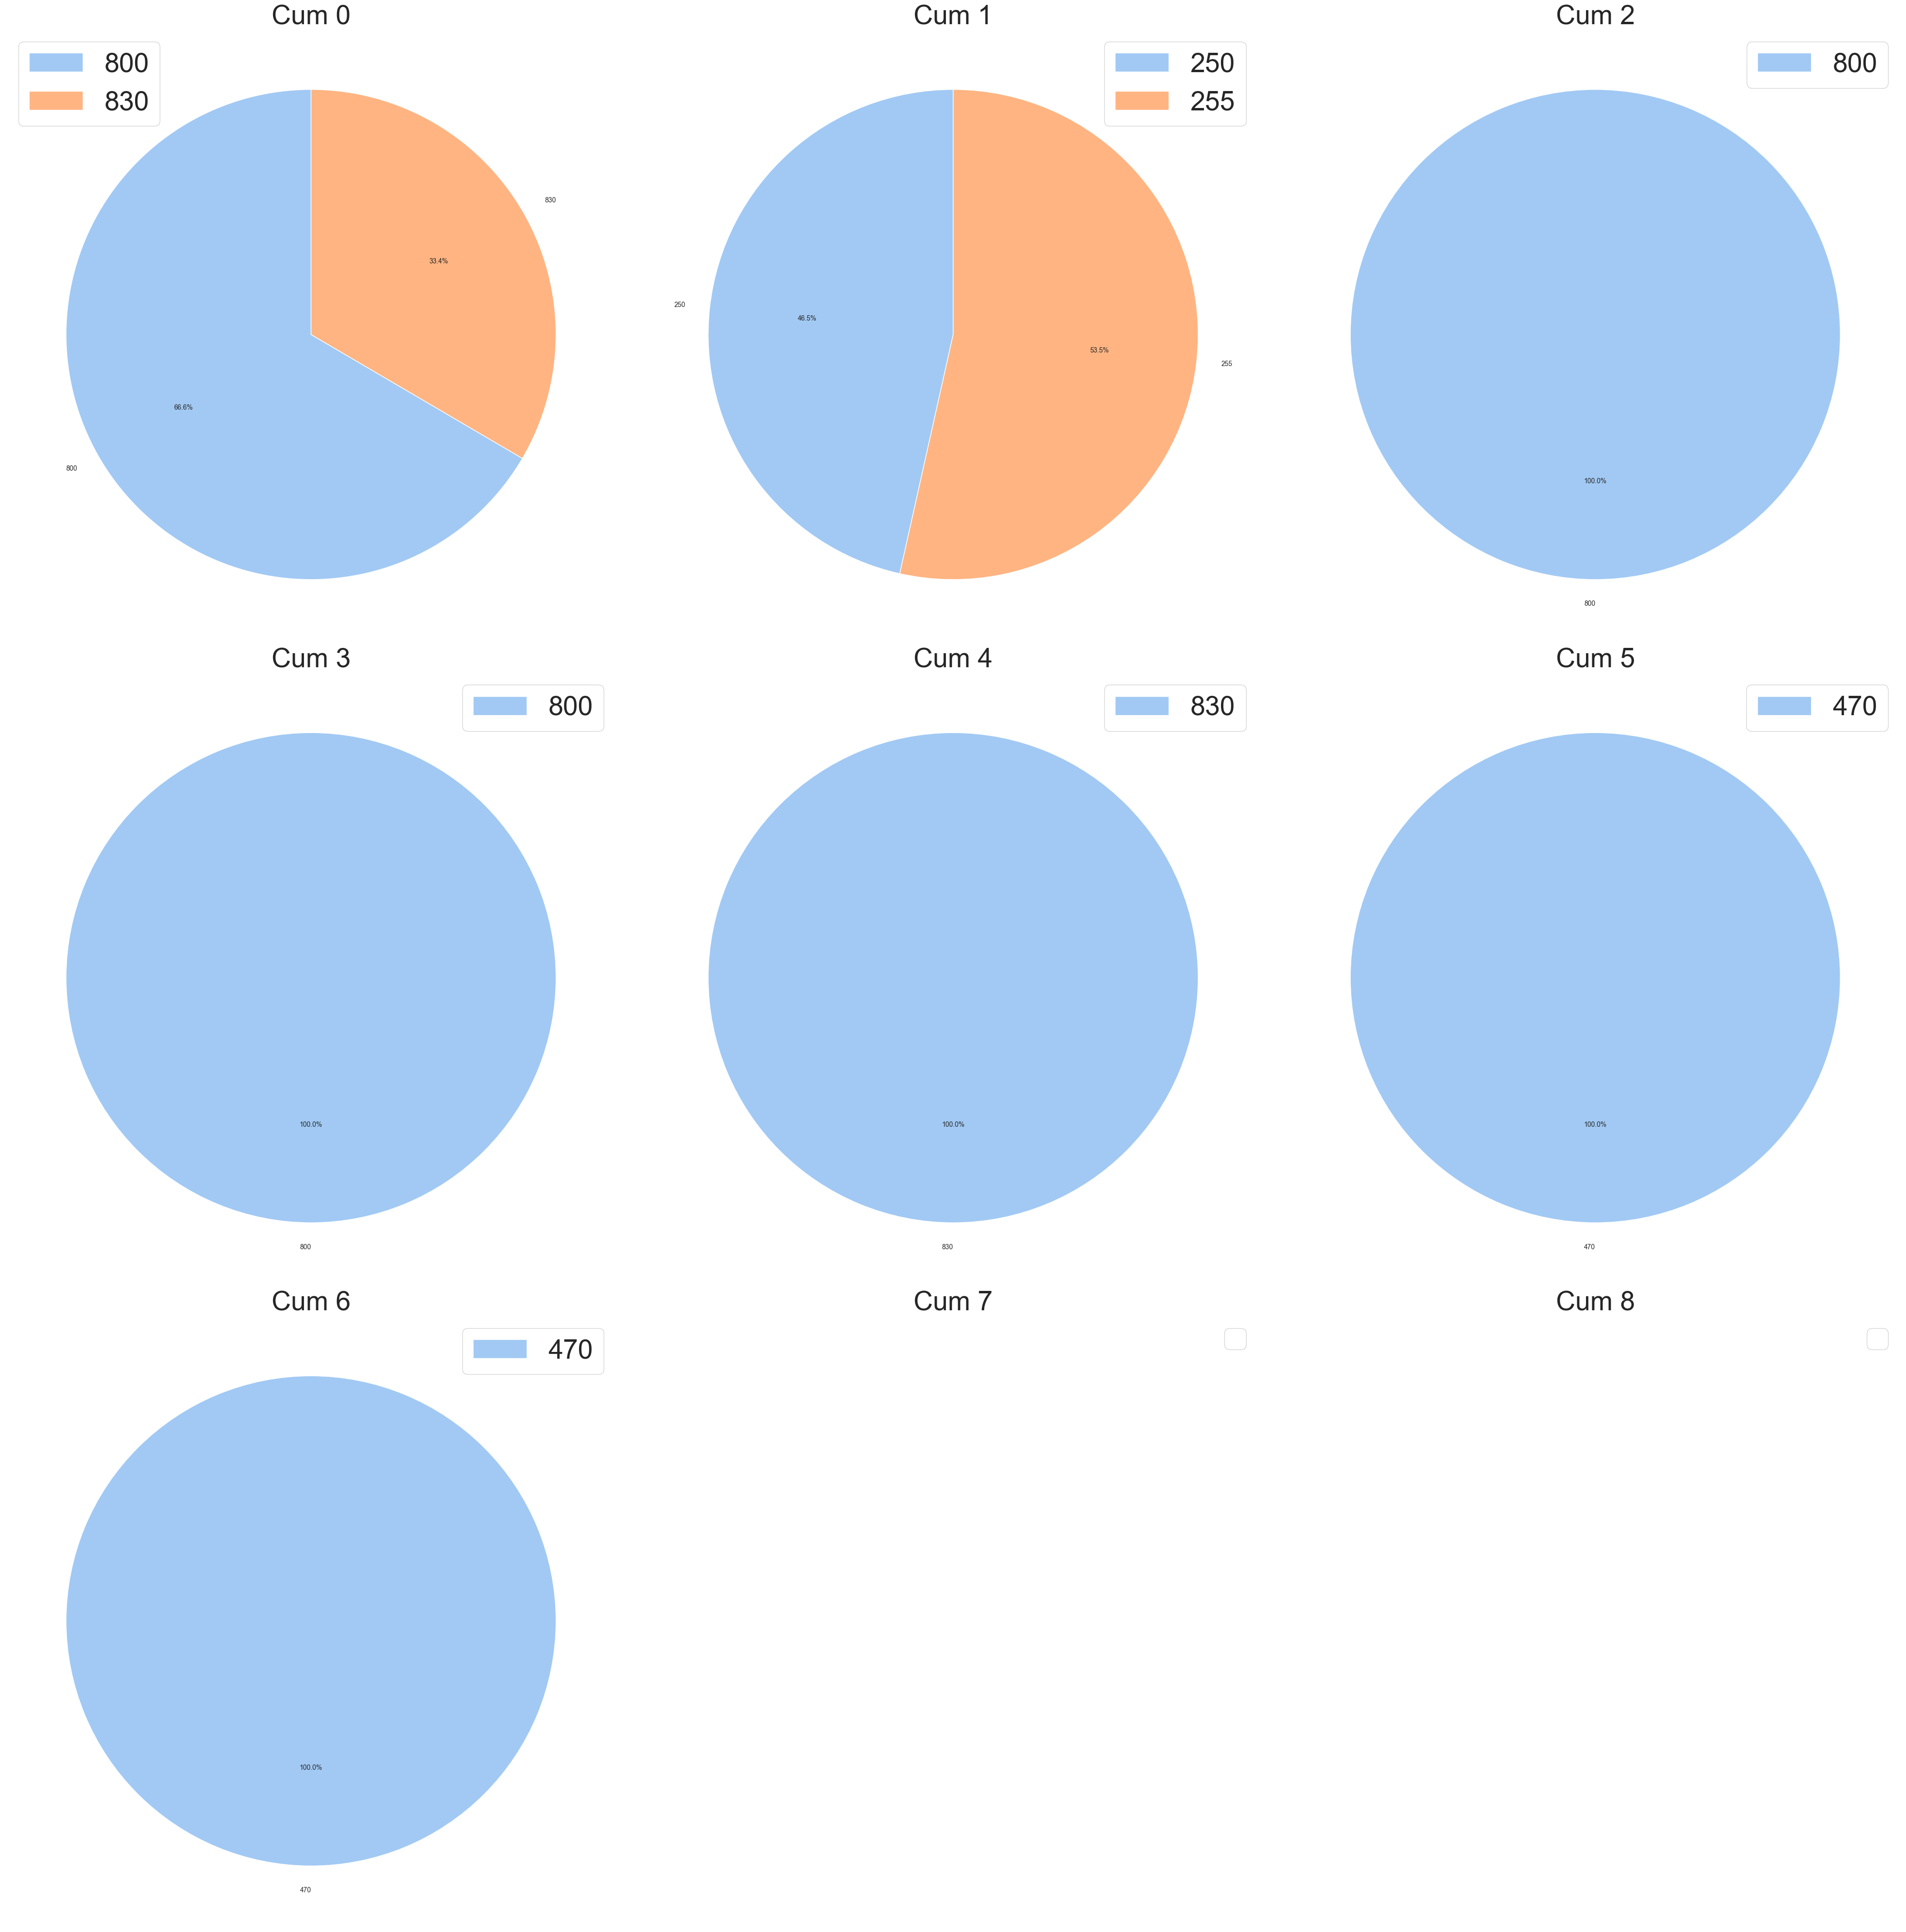

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(40, 40))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_gram[df_gram['Cluster_tong'] == f'Cum {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Khối lượng'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cum {i}', fontsize = 40)
    ax.legend(fontsize = 40)

plt.tight_layout()
plt.show();

Size và khối lượng hiệu quả: Size lớn (800g) và size trung (470g)

## Brand (thương hiệu)

In [20]:
df_brand = df.groupby(['Cluster_tong', 'Brand']).size().reset_index()
df_brand.rename(columns={0: "count"}, inplace = True)
df_brand

,Cluster_tong,Brand,count
0,Cum 0,CHOLIMEX,1726
1,Cum 0,NAM DƯƠNG,3436
2,Cum 1,NAM DƯƠNG,9643
3,Cum 2,NAM DƯƠNG,3353
4,Cum 3,NAM DƯƠNG,6867
5,Cum 4,CHOLIMEX,1721
6,Cum 5,NAM DƯƠNG,6892
7,Cum 6,NAM DƯƠNG,6834


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


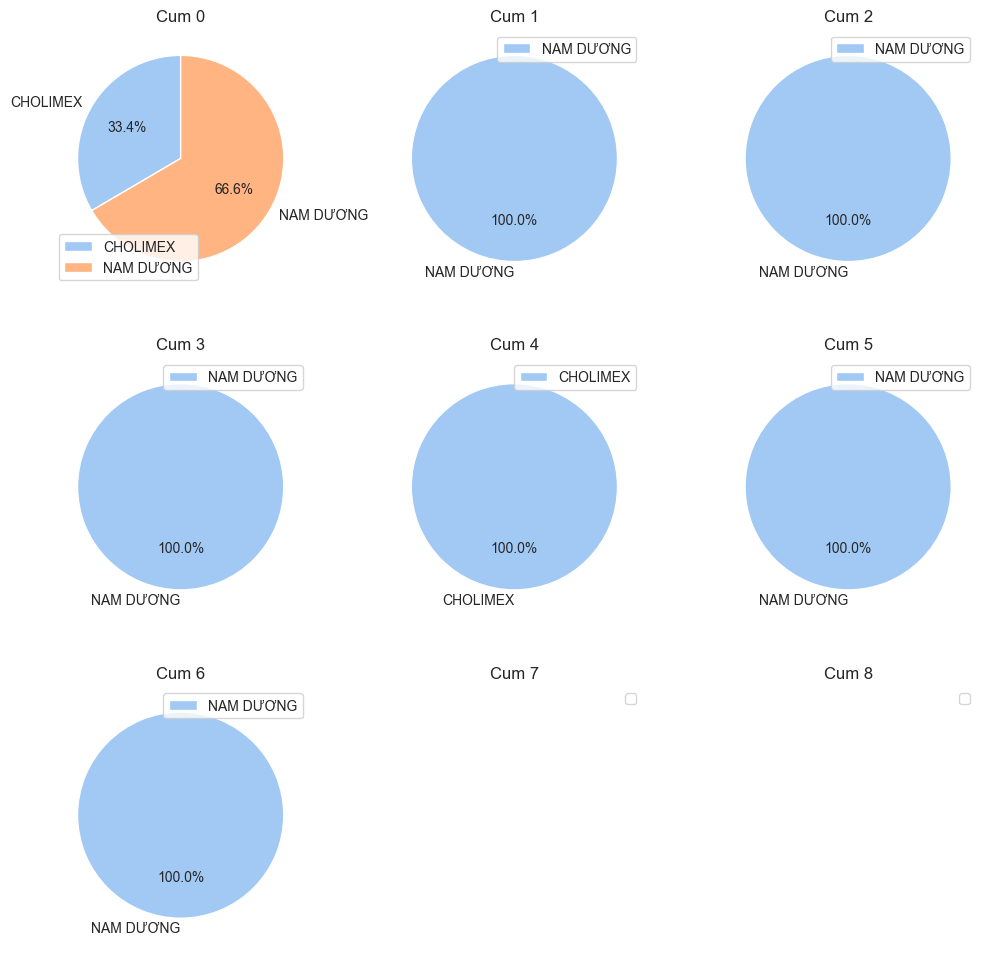

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_brand[df_brand['Cluster_tong'] == f'Cum {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Brand'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cum {i}')
    ax.legend()

plt.tight_layout()
plt.show();

Brand hiệu quả giá rẻ: Nam Dương

## Đặc tính sản phẩm

In [24]:
df_char = df.groupby(['Cluster_tong', 'Đặc tính sản phẩm','Đặc tính sản phẩm2']).size().reset_index()
df_char.rename(columns={0: "count"}, inplace = True)
df_char

,Cluster_tong,Đặc tính sản phẩm,Đặc tính sản phẩm2,count
0,Cum 0,PHỔ THÔNG,CAY,5162
1,Cum 1,PHỔ THÔNG,CAY,9643
2,Cum 2,PHỔ THÔNG,CAY,3353
3,Cum 3,PHỔ THÔNG,CAY,6867
4,Cum 4,PHỔ THÔNG,CAY,1721
5,Cum 5,PHỔ THÔNG,CAY,6892
6,Cum 6,PHỔ THÔNG,CAY,6834


Đặc tính sản phẩm: Phổ thông (cay)

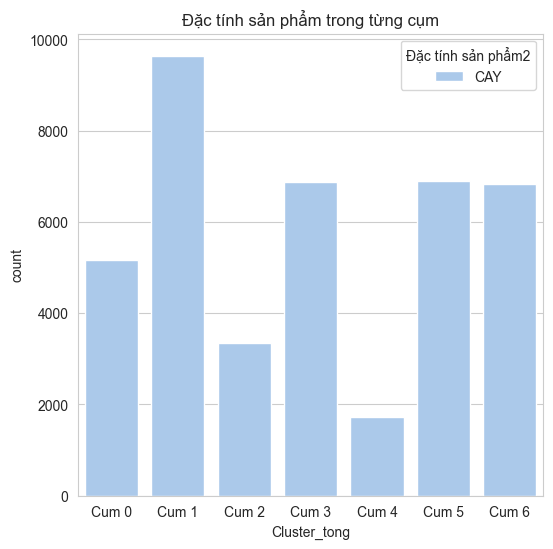

In [25]:
plt.figure(figsize=(6,6))
ax = sns.barplot(df_char, x= 'Cluster_tong', y = 'count', hue = 'Đặc tính sản phẩm2')
plt.title('Đặc tính sản phẩm trong từng cụm')
plt.show();

## Phân loại sản phẩm

In [26]:
df_type = df.groupby(['Cluster_tong', 'itemtype']).size().reset_index()
df_type.rename(columns={0: "count"}, inplace = True)
df_type

,Cluster_tong,itemtype,count
0,Cum 0,A,1055
1,Cum 0,B,2356
2,Cum 0,C,1751
3,Cum 1,A,87
4,Cum 1,B,1254
5,Cum 1,C,8302
6,Cum 2,A,1028
7,Cum 2,B,1665
8,Cum 2,C,660
9,Cum 3,A,1950


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


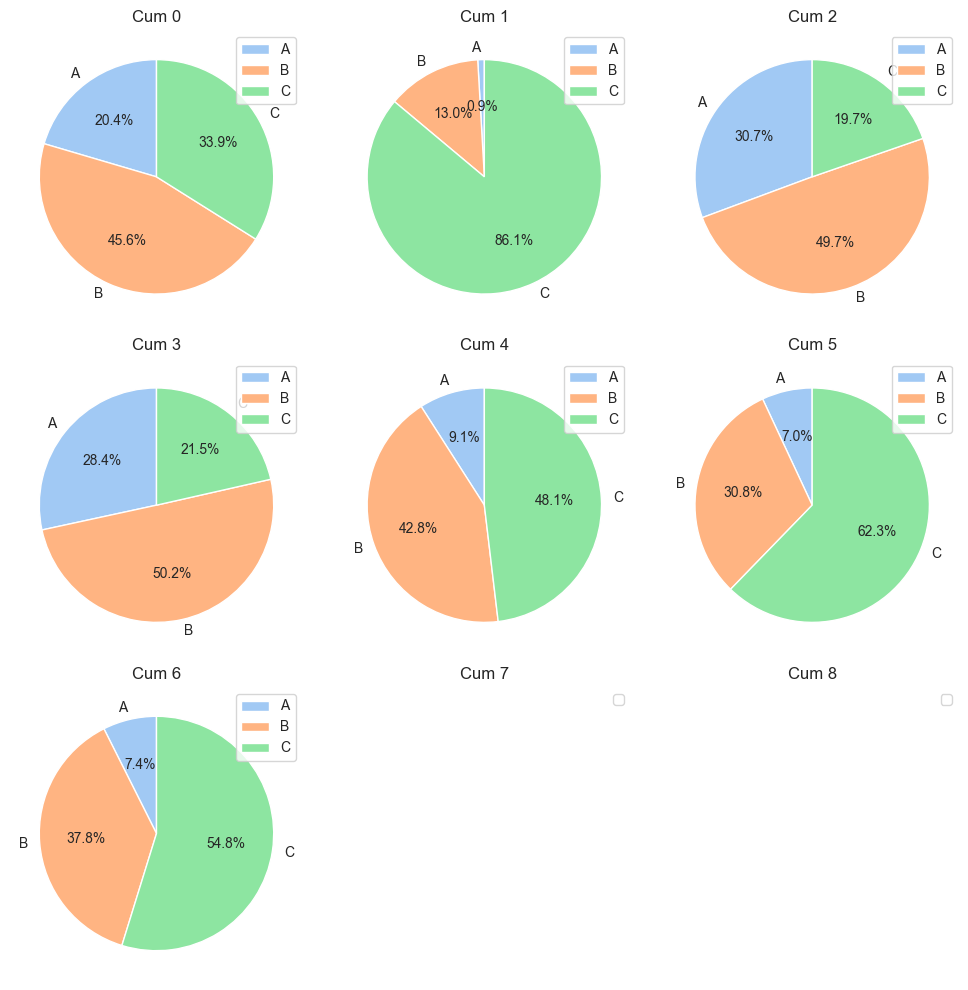

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_type[df_type['Cluster_tong'] == f'Cum {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['itemtype'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cum {i}')
    ax.legend()

plt.tight_layout()
plt.show();

Phân loại sp hiệu quả: Label B và C

# Phân tích chương trình khuyến mãi

## Facing

In [28]:
df_facing = df.groupby(['Cluster_tong', 'facing']).size().reset_index()
df_facing.rename(columns={0: "count"}, inplace = True)
df_facing

,Cluster_tong,facing,count
0,Cum 0,1,2059
1,Cum 0,2,1214
2,Cum 0,3,1231
3,Cum 0,4,385
4,Cum 0,5,152
5,Cum 0,6,103
6,Cum 0,7,6
7,Cum 0,8,6
8,Cum 0,9,6
9,Cum 1,1,5790


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


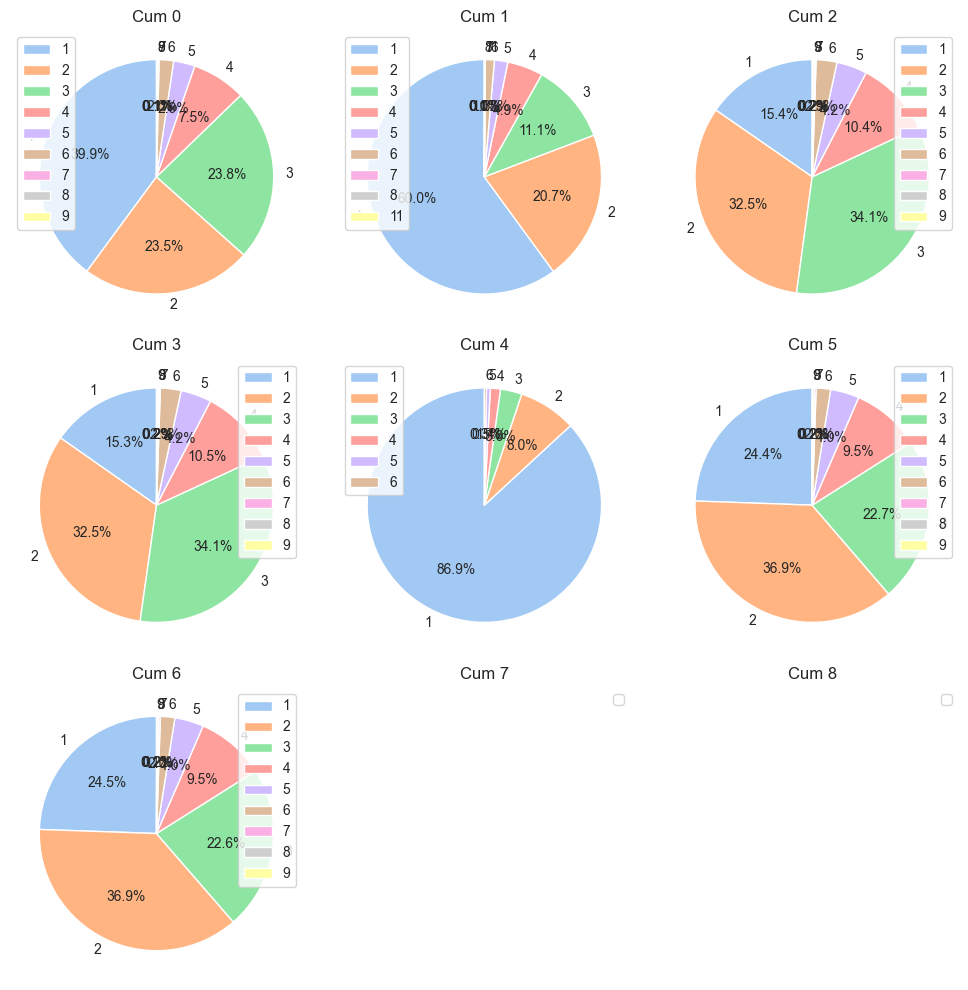

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_facing[df_facing['Cluster_tong'] == f'Cum {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['facing'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cum {i}')
    ax.legend()

plt.tight_layout()
plt.show();

Facing hiệu quả: 1,2,3

## Hình thức khuyến mãi:

In [30]:
df_htkm = df.groupby(['Cluster_tong', 'Hình thức KM']).size().reset_index()
df_htkm.rename(columns={0: "count"}, inplace = True)
df_htkm

,Cluster_tong,Hình thức KM,count
0,Cum 0,Giảm giá,5162
1,Cum 1,Giảm giá,1649
2,Cum 1,Mua 2 tính tiền 1,2835
3,Cum 1,Mua 2 tặng 1,5159
4,Cum 2,Giảm giá,3353
5,Cum 3,Giảm giá,6867
6,Cum 4,Giảm giá,1721
7,Cum 5,Giảm giá,5167
8,Cum 5,Mua 2 tặng 1,1725
9,Cum 6,Giảm giá,5142


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


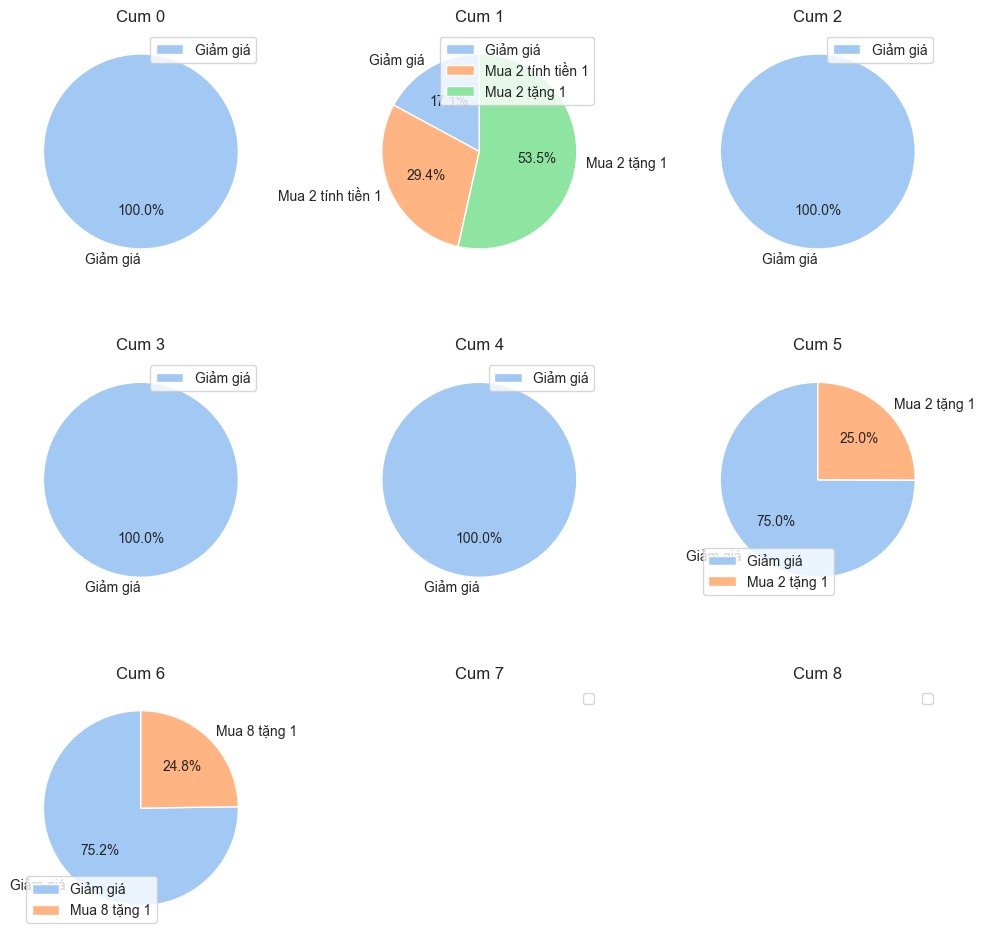

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    df_cum_nho = df_htkm[df_htkm['Cluster_tong'] == f'Cum {i}']
    ax.pie(df_cum_nho['count'], labels=df_cum_nho['Hình thức KM'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cum {i}')
    ax.legend()

plt.tight_layout()
plt.show();

Hình thức KM hiệu quả: Giảm giá

## Thời gian khuyến mãi:

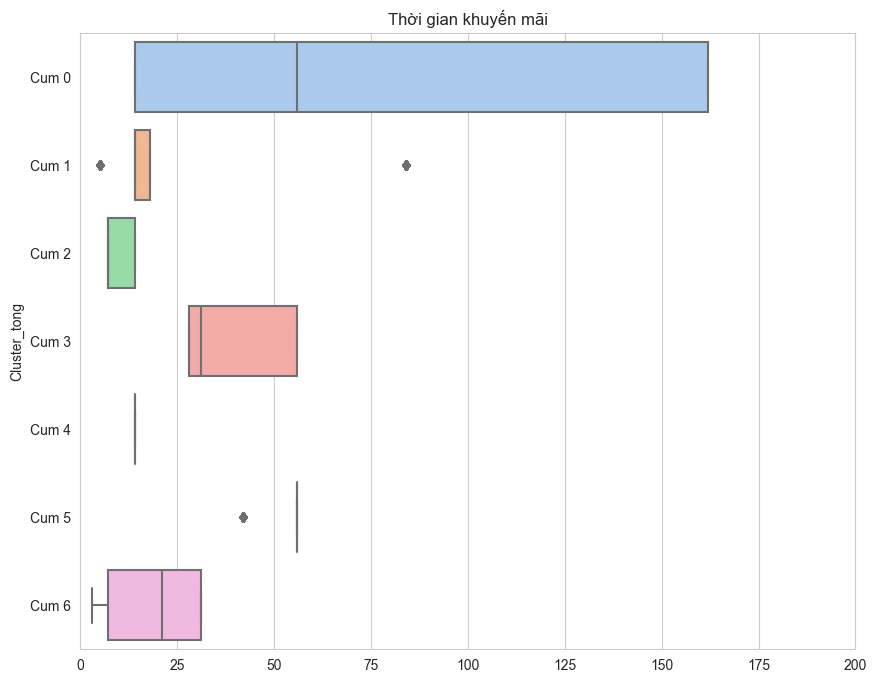

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, y="Cluster_tong", x="TGKM", dodge=False).set(xlabel=None)
plt.xlim(0,200)
plt.legend([],[], frameon=False)
plt.title('Thời gian khuyến mãi')
plt.show();

## Tỷ lệ khuyến mãi trung bình:

In [34]:
df_tlkm = df.groupby('Cluster_tong')['Tỷ lệ KM'].mean().reset_index()
df_tlkm

,Cluster_tong,Tỷ lệ KM
0,Cum 0,0.094323
1,Cum 1,0.334139
2,Cum 2,0.096174
3,Cum 3,0.101050
4,Cum 4,0.092466
5,Cum 5,0.189508
6,Cum 6,0.167969


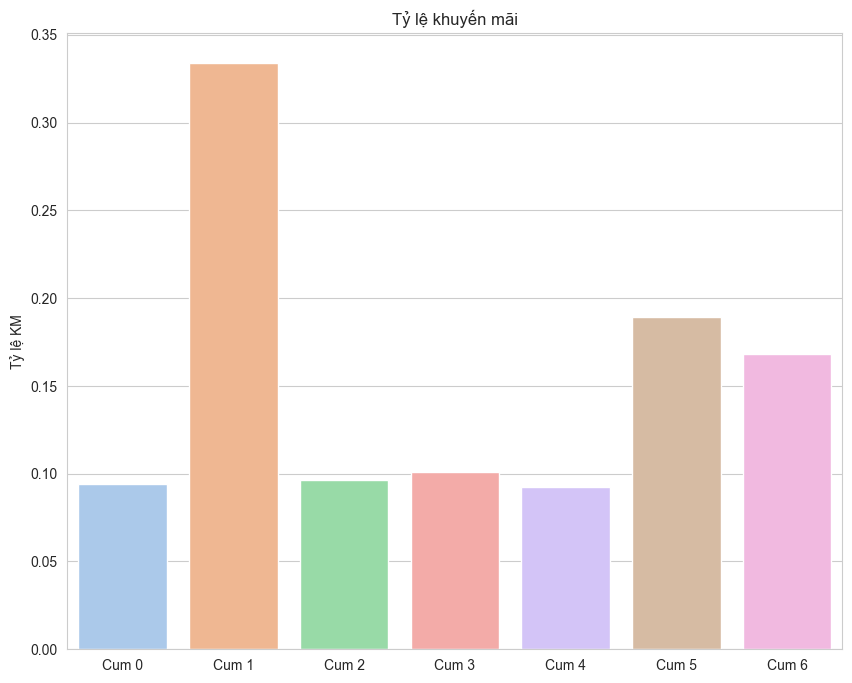

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_tlkm, x="Cluster_tong", y="Tỷ lệ KM", dodge=False).set(xlabel=None)
plt.legend([],[], frameon=False)
plt.title('Tỷ lệ khuyến mãi')
plt.show();

Tỷ lệ khuyến mãi hiệu quả: 0.1 hoặc 0.18